In [15]:
import pandas as pd
import pdfplumber

# Load Excel file
xlsx_data = pd.read_excel('/content/ELECT Loan Data (1).xlsx')

# Load PDF file
pdf_data = []
with pdfplumber.open('ELECT_Loans_Database_Table.pdf') as pdf:
    for page in pdf.pages:
        table = page.extract_table()
        if table:
            pdf_data.extend(table)

# Convert the PDF data into a DataFrame
columns = pdf_data[0]  # Assume first row contains the column headers
pdf_df = pd.DataFrame(pdf_data[1:], columns=columns)

# Clean PDF data: convert columns to the appropriate types
pdf_df = pdf_df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Combine the two dataframes
combined_df = pd.concat([xlsx_data, pdf_df], ignore_index=True)

# Ensure the loan data is indexed on the LoanID column
combined_df.set_index('Loan_ID', inplace=True)


In [17]:
# Print the column names to check for 'Loan_ID'
print(combined_df.columns)


Index(['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
# Remove duplicate Loan_ID entries
combined_df.drop_duplicates(subset='Loan_ID', keep='first', inplace=True)


In [29]:
pip install pandas openpyxl xlrd


In [20]:
# Fill missing numerical data with median values (you can customize this based on business rules)
combined_df['LoanAmount'].fillna(combined_df['LoanAmount'].median(), inplace=True)
combined_df['ApplicantIncome'].fillna(combined_df['ApplicantIncome'].median(), inplace=True)
combined_df['CoapplicantIncome'].fillna(0, inplace=True)  # If coapplicant income is missing, assume 0
combined_df['Credit_History'].fillna(1, inplace=True)  # Assuming missing credit history is good credit


<ipython-input-20-950a8e021048>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['LoanAmount'].fillna(combined_df['LoanAmount'].median(), inplace=True)
<ipython-input-20-950a8e021048>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

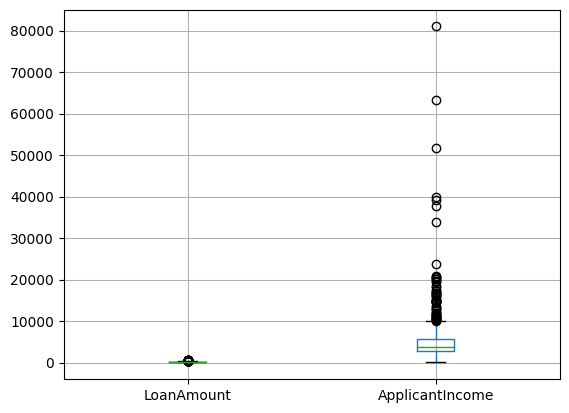

In [19]:
# Visualize outliers using boxplots
import matplotlib.pyplot as plt
combined_df[['LoanAmount', 'ApplicantIncome']].boxplot()
plt.show()

# Cap extreme values for LoanAmount and ApplicantIncome
q1 = combined_df['LoanAmount'].quantile(0.05)
q3 = combined_df['LoanAmount'].quantile(0.95)
combined_df['LoanAmount'] = combined_df['LoanAmount'].clip(lower=q1, upper=q3)

q1_income = combined_df['ApplicantIncome'].quantile(0.05)
q3_income = combined_df['ApplicantIncome'].quantile(0.95)
combined_df['ApplicantIncome'] = combined_df['ApplicantIncome'].clip(lower=q1_income, upper=q3_income)


In [21]:
# Summary statistics
summary_stats = combined_df.describe()
print(summary_stats)


           Gender     Married  Dependents    Graduate  Self_Employed  \
count  645.000000  645.000000  645.000000  645.000000     645.000000   
mean     1.186047    0.648062    0.731783    0.784496       0.130233   
std      0.389446    0.477945    1.002015    0.411491       0.336820   
min      1.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    1.000000       0.000000   
50%      1.000000    1.000000    0.000000    1.000000       0.000000   
75%      1.000000    1.000000    1.000000    1.000000       0.000000   
max      2.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       645.000000         645.000000  645.000000        645.000000   
mean       4890.088372        1608.560806  143.665426        334.837209   
std        3172.004725        2867.004510   65.592439         63.206969   
min        1876.000000           0.000000   58.2000

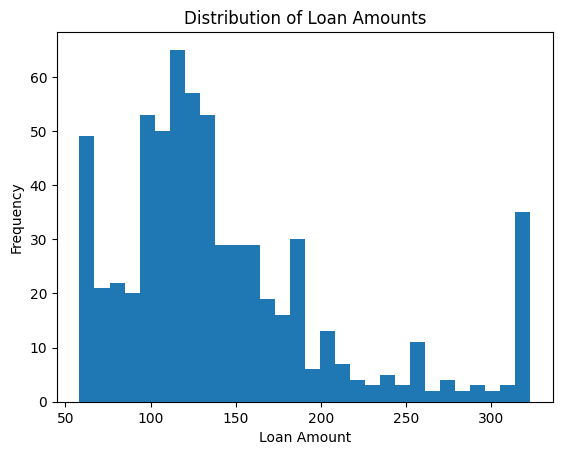

In [22]:
# Histogram for LoanAmount
combined_df['LoanAmount'].plot(kind='hist', bins=30, title='Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.show()


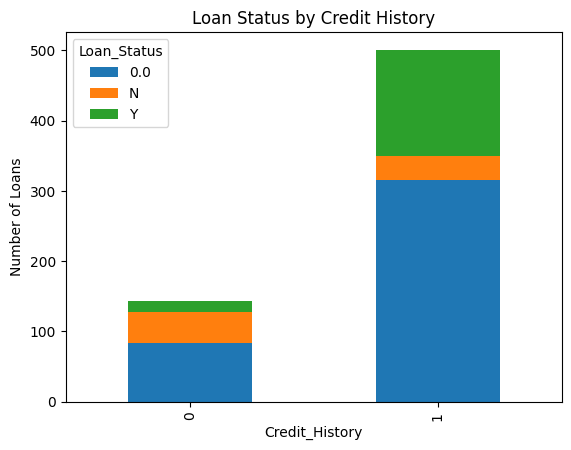

In [23]:
# Group by Credit History and Loan Status
loan_status_by_credit = combined_df.groupby(['Credit_History', 'Loan_Status']).size().unstack()

# Plot Loan Status by Credit History
loan_status_by_credit.plot(kind='bar', stacked=True, title='Loan Status by Credit History')
plt.ylabel('Number of Loans')
plt.show()


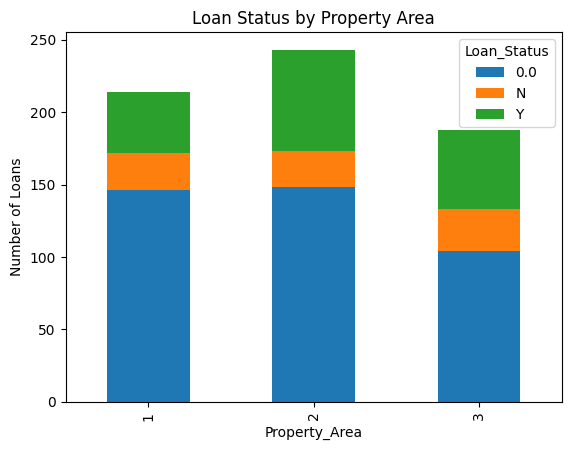

In [24]:
# Group by Property Area and Loan Status
loan_status_by_property = combined_df.groupby(['Property_Area', 'Loan_Status']).size().unstack()

# Plot Loan Status by Property Area
loan_status_by_property.plot(kind='bar', stacked=True, title='Loan Status by Property Area')
plt.ylabel('Number of Loans')
plt.show()


In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_data = pd.read_excel('/content/ELECT Loan Data (1).xlsx')

# Basic Information
print(loan_data.head())
print(loan_data.info())


   Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0     2284       1        0           0         0              0   
1     2287       2        0           0         1              0   
2     2288       1        1           2         0              0   
3     2296       1        0           0         0              0   
4     2297       1        0           0         1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3902             1666.0         109               333   
1             1500             1800.0         103               333   
2             2889                0.0          45               180   
3             2755                0.0          65               300   
4             2500            20000.0         103               333   

   Credit_History  Property_Area Loan_Status  
0               1              3           Y  
1               0              2           N  
2               0      

   Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0     2284       1        0           0         0              0   
1     2287       2        0           0         1              0   
2     2288       1        1           2         0              0   
3     2296       1        0           0         0              0   
4     2297       1        0           0         1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3902             1666.0         109               333   
1             1500             1800.0         103               333   
2             2889                0.0          45               180   
3             2755                0.0          65               300   
4             2500            20000.0         103               333   

   Credit_History  Property_Area Loan_Status  
0               1              3           Y  
1               0              2           N  
2               0      

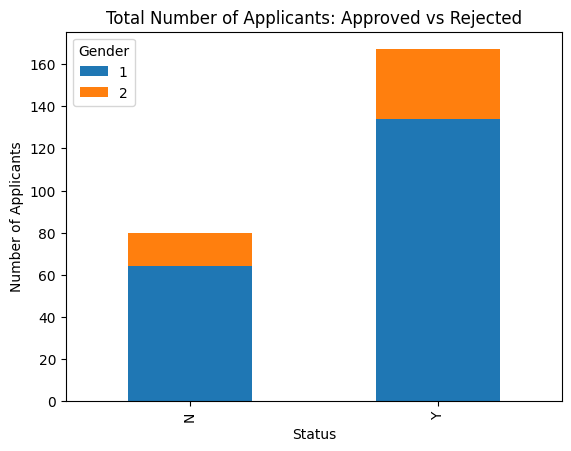

Maximum Amount Loaned: 600
Minimum Amount Loaned: 9


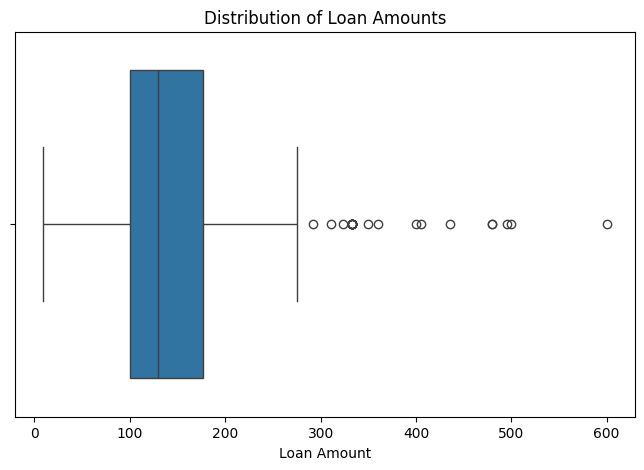

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_data = pd.read_excel('/content/ELECT Loan Data (1).xlsx')

# Basic Information
print(loan_data.head())
print(loan_data.info())

# Descriptive Analysis
total_loaned = loan_data['LoanAmount'].sum()
average_loaned = loan_data['LoanAmount'].mean()
average_loan_term = loan_data['Loan_Amount_Term'].mean()

print(f'Total Amount Loaned by EFS: {total_loaned}')
print(f'Average Amount Loaned: {average_loaned}')
print(f'Average Loan Term: {average_loan_term}')

# Total Number of Applicants
applicant_status = loan_data.groupby(['Loan_Status', 'Gender']).size().unstack().fillna(0)
applicant_status.plot(kind='bar', stacked=True)
plt.title('Total Number of Applicants: Approved vs Rejected')
plt.xlabel('Status')
plt.ylabel('Number of Applicants')
plt.legend(title='Gender')
plt.show()

# Max and Min Amounts Loaned
max_loaned = loan_data['LoanAmount'].max()
min_loaned = loan_data['LoanAmount'].min()
print(f'Maximum Amount Loaned: {max_loaned}')
print(f'Minimum Amount Loaned: {min_loaned}')

plt.figure(figsize=(8, 5))
sns.boxplot(x=loan_data['LoanAmount'])
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.show()


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your previous code) ...

# Check if sizes contain valid values for plotting
if sizes[0] > 0 or sizes[1] > 0:  # Ensure at least one value is greater than zero
    plt.figure(figsize=(8, 5))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Self-employed Loan Approval Rate')
    plt.show()
else:
    print('No data available for plotting the self-employed loan approval rate. Check if there are any approved self-employed or approved loans in the dataset.') # More descriptive error message
# Remove the redundant pie chart plotting code
# ... (rest of your code) ...

No data available for plotting the self-employed loan approval rate. Check if there are any approved self-employed or approved loans in the dataset.
